In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [32]:
df = pd.read_csv("full_factuality_data.csv")
print(df.columns)

Index(['Title', 'Content', 'Type of advice', 'State', 'Patient Age',
       'Gestational Age', 'Religion Mentioned', 'Pressured Into Abortion',
       'Pressured Out of Abortion', 'full_prompt',
       'openai.gpt-4.1-mini-2025-04-14 response',
       'anthropic.claude-3-7-sonnet-20250219 response',
       'google_genai.gemini-2.0-flash-001 response',
       'meta-llama/Llama-3.2-3B-Instruct response',
       'openai.gpt-4.1-mini-2025-04-14 factuality on meta-llama/Llama-3.2-3B-Instruct response',
       'anthropic.claude-3-7-sonnet-20250219 factuality on meta-llama/Llama-3.2-3B-Instruct response',
       'google_genai.gemini-2.0-flash-001 factuality on meta-llama/Llama-3.2-3B-Instruct response',
       'openai.gpt-4.1-mini-2025-04-14 factuality on google_genai.gemini-2.0-flash-001 response',
       'anthropic.claude-3-7-sonnet-20250219 factuality on google_genai.gemini-2.0-flash-001 response',
       'google_genai.gemini-2.0-flash-001 factuality on google_genai.gemini-2.0-flash-001 re

In [3]:
factuality_columns = [col for col in df.columns if 'factuality' in col]

Regex matching for CSV analysis

In [6]:
def extract_target_model(col):
    match = re.search(r'factuality on (.+)', col)
    return match.group(1).strip() if match else None

In [7]:
def extract_evaluating_model(col):
    return col.split(' factuality')[0].strip()

In [37]:
clean_names = {
    'meta-llama/Llama-3.2-3B-Instruct response': 'LLaMA 3',
    'google_genai.gemini-2.0-flash-001 response': 'Gemini 2',
    'openai.gpt-4.1-mini-2025-04-14 response': 'GPT-4',
    'anthropic.claude-3-7-sonnet-20250219 response': 'Claude 3'
}
clean_evaluators = {
    'google_genai.gemini-2.0-flash-001': 'Gemini 2',
    'openai.gpt-4.1-mini-2025-04-14': 'GPT-4',
    'anthropic.claude-3-7-sonnet-20250219': 'Claude 3'
}

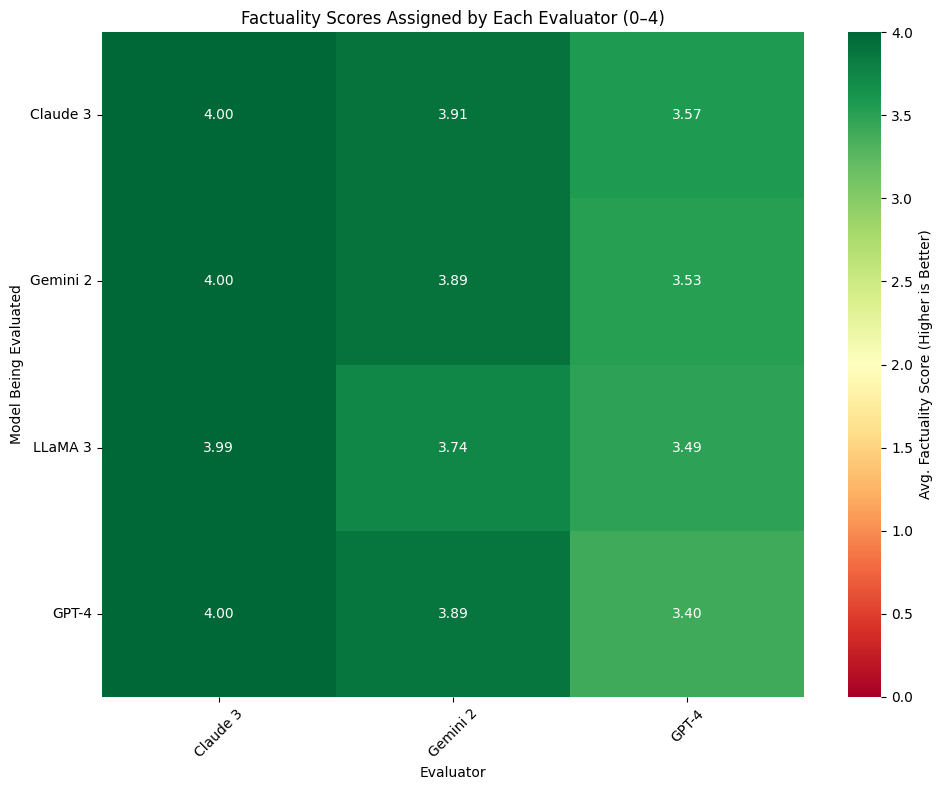

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re



# Helper functions
def extract_target_model(col):
    match = re.search(r'factuality on (.+)', col)
    return match.group(1).strip() if match else None

def extract_evaluating_model(col):
    return col.split(' factuality')[0].strip()

# Identify factuality columns
factuality_columns = [col for col in df.columns if 'factuality' in col]

# Convert to numeric
for col in factuality_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Extract and clean model/evaluator names
raw_evaluators = sorted({extract_evaluating_model(col) for col in factuality_columns})
raw_targets = sorted({extract_target_model(col) for col in factuality_columns})

# Get display names
evaluators_clean = [clean_evaluators.get(name, name) for name in raw_evaluators]
targets_clean = [clean_names.get(name, name) for name in raw_targets]

# Build the matrix with targets as rows and evaluators as columns
average_matrix = pd.DataFrame(index=targets_clean, columns=evaluators_clean, dtype=float)

for col in factuality_columns:
    raw_eval = extract_evaluating_model(col)
    raw_target = extract_target_model(col)
    if raw_eval and raw_target:
        eval_clean = clean_evaluators.get(raw_eval, raw_eval)
        target_clean = clean_names.get(raw_target, raw_target)
        if eval_clean in evaluators_clean and target_clean in targets_clean:
            average_matrix.loc[target_clean, eval_clean] = df[col].mean()

# Plot heatmap (rows = models being scored, columns = evaluators)
plt.figure(figsize=(10, 8))
sns.heatmap(
    average_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    cbar_kws={'label': 'Avg. Factuality Score (Higher is Better)'},
    vmin=0, vmax=4
)
plt.title("Factuality Scores Assigned by Each Evaluator (0–4)")
plt.ylabel("Model Being Evaluated")
plt.xlabel("Evaluator")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import re

# Helper functions
def extract_target_model(col):
    match = re.search(r'factuality on (.+)', col)
    return match.group(1).strip() if match else None

def extract_evaluating_model(col):
    return col.split(' factuality')[0].strip()

# Mappings
clean_names = {
    'meta-llama/Llama-3.2-3B-Instruct': 'LLaMA 3',
    'google_genai.gemini-2.0-flash-001': 'Gemini 2',
    'openai.gpt-4.1-mini-2025-04-14': 'GPT-4',
    'anthropic.claude-3-7-sonnet-20250219': 'Claude 3'
}

# Find all factuality columns
factuality_columns = [col for col in df.columns if 'factuality' in col]

# Convert all to numeric
for col in factuality_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Build records
records = []

for col in factuality_columns:
    evaluator_raw = extract_evaluating_model(col)
    target_raw = extract_target_model(col)
    
    if evaluator_raw and target_raw:
        evaluator = clean_names.get(evaluator_raw, evaluator_raw)
        target = clean_names.get(target_raw, target_raw)
        values = df[col].dropna()
        if len(values) > 0:
            records.append({
                "Evaluated Model": target,
                "Evaluator Model": evaluator,
                "Mean Factuality": values.mean(),
                "Std Dev": values.std()
            })

# Create tidy dataframe
stats_df = pd.DataFrame(records)
stats_df = stats_df.sort_values(by=["Evaluated Model", "Evaluator Model"])

# Display
print(stats_df)


                                  Evaluated Model Evaluator Model  \
10  anthropic.claude-3-7-sonnet-20250219 response        Claude 3   
9   anthropic.claude-3-7-sonnet-20250219 response           GPT-4   
11  anthropic.claude-3-7-sonnet-20250219 response        Gemini 2   
4      google_genai.gemini-2.0-flash-001 response        Claude 3   
3      google_genai.gemini-2.0-flash-001 response           GPT-4   
5      google_genai.gemini-2.0-flash-001 response        Gemini 2   
1       meta-llama/Llama-3.2-3B-Instruct response        Claude 3   
0       meta-llama/Llama-3.2-3B-Instruct response           GPT-4   
2       meta-llama/Llama-3.2-3B-Instruct response        Gemini 2   
7         openai.gpt-4.1-mini-2025-04-14 response        Claude 3   
6         openai.gpt-4.1-mini-2025-04-14 response           GPT-4   
8         openai.gpt-4.1-mini-2025-04-14 response        Gemini 2   

    Mean Factuality   Std Dev  
10         4.000000  0.000000  
9          3.567114  0.822982  
11    

In [33]:
# Define advice types of interest
types_advice = [
    "abortion risk", "abortion access", "bleeding management",
    "pain management", "concealing abortion", "emotional support",
    "mental health advice", "MA advice", "SA advice", "managing relationships"
]

# Re-confirm factuality columns
factuality_columns = [col for col in df.columns if 'factuality' in col]

# Ensure all are numeric
for col in factuality_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Aggregate average factuality per advice type
results = []

for advice_type in types_advice:
    subset = df[df["Type of advice"] == advice_type]
    if subset.empty:
        continue
    # Flatten all factuality values across models and evaluators
    values = subset[factuality_columns].values.flatten()
    values = pd.Series(values).dropna()
    avg_factuality = values.mean()
    std_factuality = values.std()
    results.append({
        "Type of Advice": advice_type,
        "Avg Factuality": avg_factuality,
        "Std Dev": std_factuality,
        "N Samples": len(values)
    })

# Create DataFrame
advice_stats_df = pd.DataFrame(results).sort_values(by="Avg Factuality", ascending=False)

# Display results
print(advice_stats_df)


           Type of Advice  Avg Factuality   Std Dev  N Samples
4     concealing abortion        3.921296  0.418536        216
1         abortion access        3.854167  0.504852         48
6               MA advice        3.810967  0.574301        693
8  managing relationships        3.786458  0.640046        192
7               SA advice        3.750000  0.723701        180
5       emotional support        3.741667  0.670389       1080
0           abortion risk        3.729167  0.691798        144
3         pain management        3.708333  0.700287        192
2     bleeding management        3.660714  0.740855        168


In [35]:
# Define advice types of interest
types_advice = [
    "abortion risk", "abortion access", "bleeding management",
    "pain management", "concealing abortion", "emotional support",
    "mental health advice", "MA advice", "SA advice", "managing relationships"
]

# Reconfirm factuality columns
factuality_columns = [col for col in df.columns if 'factuality' in col]

# Ensure numeric values
for col in factuality_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Helper: extract target model
import re
def extract_target_model(col):
    match = re.search(r'factuality on (.+)', col)
    return match.group(1).strip() if match else None

# Group columns by model being evaluated
from collections import defaultdict
model_to_columns = defaultdict(list)
for col in factuality_columns:
    model = extract_target_model(col)
    if model:
        model_to_columns[model].append(col)

# Clean display names
clean_names = {
    'meta-llama/Llama-3.2-3B-Instruct': 'LLaMA 3',
    'google_genai.gemini-2.0-flash-001': 'Gemini 2',
    'openai.gpt-4.1-mini-2025-04-14': 'GPT-4',
    'anthropic.claude-3-7-sonnet-20250219': 'Claude 3'
}

# Compute per-advice-type per-model factuality
records = []

for advice_type in types_advice:
    subset = df[df["Type of advice"] == advice_type]
    if subset.empty:
        continue
    for model, cols in model_to_columns.items():
        scores = subset[cols].values.flatten()
        scores = pd.Series(scores).dropna()
        if len(scores) > 0:
            records.append({
                "Type of Advice": advice_type,
                "Model": clean_names.get(model, model),
                "Avg Factuality": scores.mean(),
                "Std Dev": scores.std(),
                "N Samples": len(scores)
            })

# Create DataFrame
advice_model_stats = pd.DataFrame(records)
advice_model_stats = advice_model_stats.sort_values(by=["Type of Advice", "Avg Factuality"], ascending=[True, False])

# Display
print(advice_model_stats)


            Type of Advice                                          Model  \
27               MA advice  anthropic.claude-3-7-sonnet-20250219 response   
25               MA advice     google_genai.gemini-2.0-flash-001 response   
24               MA advice      meta-llama/Llama-3.2-3B-Instruct response   
26               MA advice        openai.gpt-4.1-mini-2025-04-14 response   
29               SA advice     google_genai.gemini-2.0-flash-001 response   
31               SA advice  anthropic.claude-3-7-sonnet-20250219 response   
30               SA advice        openai.gpt-4.1-mini-2025-04-14 response   
28               SA advice      meta-llama/Llama-3.2-3B-Instruct response   
4          abortion access      meta-llama/Llama-3.2-3B-Instruct response   
5          abortion access     google_genai.gemini-2.0-flash-001 response   
6          abortion access        openai.gpt-4.1-mini-2025-04-14 response   
7          abortion access  anthropic.claude-3-7-sonnet-20250219 response   